## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum()
# пропущенных данных нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
X.info()
# категориальных переменных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed())

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(data=X_train_norm)
X_test_norm = pd.DataFrame(data=X_test_norm)

In [9]:
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
y_predicted1 = clf1.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr1 = clf1.predict(X_train_norm[{0, 4}])
y_predicted2 = clf2.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr2 = clf2.predict(X_train_norm[{0, 4}])
y_predicted3 = clf3.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr3 = clf3.predict(X_train_norm[{0, 4}])
y_predicted4 = clf4.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr4 = clf4.predict(X_train_norm[{0, 4}])
y_predicted5 = clf5.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr5 = clf5.predict(X_train_norm[{0, 4}])
y_predicted6 = clf6.fit(X_train_norm[{0, 4}], y_train).predict(X_test_norm[{0, 4}])
y_tr_pr6 = clf6.predict(X_train_norm[{0, 4}])

In [20]:
print('NN 	  Train	 Test')
print("1 	 ", round(np.mean(y_train==y_tr_pr1), 2), ' 	', round(np.mean(y_test==y_predicted1), 2))
print("3 	 ", round(np.mean(y_train==y_tr_pr2), 2), '	', round(np.mean(y_test==y_predicted2), 2))
print("5 	 ", round(np.mean(y_train==y_tr_pr3), 2), '	', round(np.mean(y_test==y_predicted3), 2))
print("10 	 ", round(np.mean(y_train==y_tr_pr4), 2), '	', round(np.mean(y_test==y_predicted4), 2))
print("15 	 ", round(np.mean(y_train==y_tr_pr5), 2), '	', round(np.mean(y_test==y_predicted5), 2))
print("25 	 ", round(np.mean(y_train==y_tr_pr6), 2), '	', round(np.mean(y_test==y_predicted6), 2))

NN 	  Train	 Test
1 	  1.0  	 0.65
3 	  0.78 	 0.63
5 	  0.76 	 0.69
10 	  0.75 	 0.8
15 	  0.73 	 0.76
25 	  0.72 	 0.74


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [21]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [22]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [23]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [24]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.127916,-1.121027,0.493352,1.386956,-1.483680,-0.504128,-0.488153,0.355631,-0.292743,-1.189441,1.506422,0.103406,-0.348474
1,1.765076,-0.390254,0.455473,-0.833368,0.799714,2.536011,1.597992,-0.948568,1.087088,1.361355,-0.470026,1.146917,2.287088
2,0.135399,1.347561,-0.074843,0.616011,0.799714,-1.473685,-0.695675,-0.133444,-0.752687,2.090154,-1.743738,-1.883554,-0.596527
3,-0.319395,-0.568491,-0.377880,0.924389,-1.092241,-1.522985,-0.291553,1.007731,0.114130,-0.688392,-0.382184,-0.325434,-0.788768
4,0.994453,-0.764552,1.213066,-0.000746,2.039270,1.057025,0.778825,1.170755,-0.381194,0.268157,1.242896,0.503657,1.527426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.140550,-0.203104,-0.794557,0.461821,-1.027001,0.481863,0.680525,0.111094,-0.381194,-0.934361,-0.470026,0.903908,-1.129841
120,-0.572058,0.037516,-0.794557,0.461821,-0.831281,0.399697,0.265480,-0.785543,-0.611166,-1.280540,-0.294342,0.189174,-1.294176
121,1.449247,-0.809112,-0.226362,-0.833368,-0.374603,-0.175464,0.440236,-0.785543,0.007989,0.085957,0.891527,0.246353,1.666956
122,0.817589,2.283308,-0.112723,0.153443,-0.570322,-0.504128,-1.340086,0.926218,-0.964969,-0.187342,-0.250421,-0.854338,-0.596527


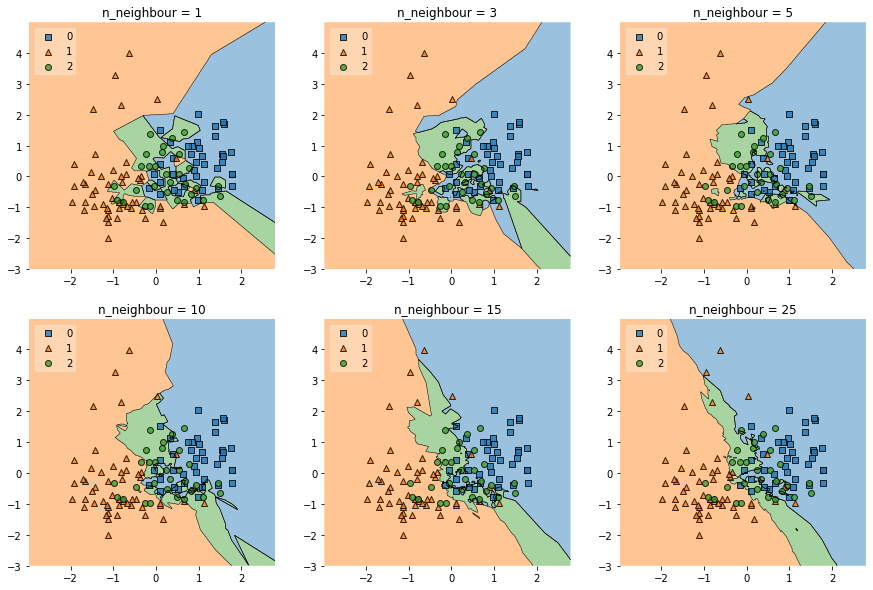

In [25]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))

labels = ['n_neighbour = 1', 'n_neighbour = 3', 'n_neighbour = 5', 'n_neighbour = 10', 'n_neighbour = 15', 'n_neighbour = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.asarray(X_train_norm[{0, 4}]), y=np.asarray(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Из номера 1.3 мы видим, что наибольшую долю правильных предсказаний демонстрирует модель с числом соседей равным 10 (на тестовых данных доля 0.8). На основе графиков можно сделать вывод, что все данные не группируются в четко идентифицируемые группы. Решающие поверхности для моделей с малым числом соседей (n = 1, 3) достаточно "извилисты", что может служить признаком переобучения. В то же время, решающие поверхности для большого числа соседей (n = 25), наоборот, недостаточно хорошо постраиваются под данные (наблюдаем упрощение форм поверхности), что также может привести к снижению предсказательной способности модели. Графики решающих поверхностей и данные о долях правильных ответов для моделей отлично согласуются между собой давая причино-следственную картину об обучении моделей knn.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

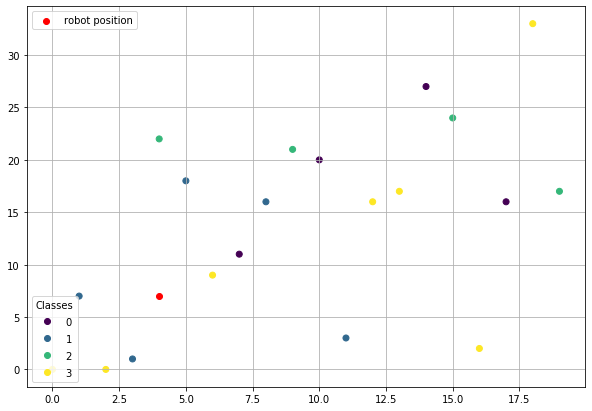

In [28]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.empty((0, 2), int)
        
        self.position = np.array(initial_position)
        self.trajectory = np.append(self.trajectory, np.array([self.position]), axis=0)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2) == 1:
            self.position = np.add(self.position, self.mapping[0])
        else:
            n = self.knn.predict(np.array([self.position]))
            self.position = np.add(self.position, self.mapping[n[0]])
        
        self.trajectory = np.append(self.trajectory, np.array([self.position]), axis=0)


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [31]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    for i in range(4):
        print([i for i in classes.tolist()].count(i)) # понадобится для объяснения 2.3
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)

    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

6
6
10
8


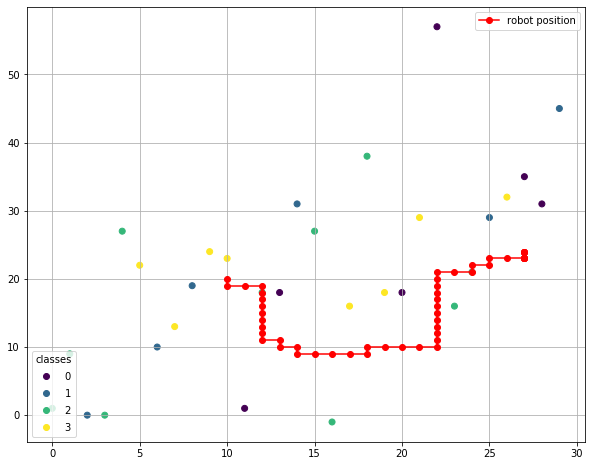

In [32]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

6
6
10
8


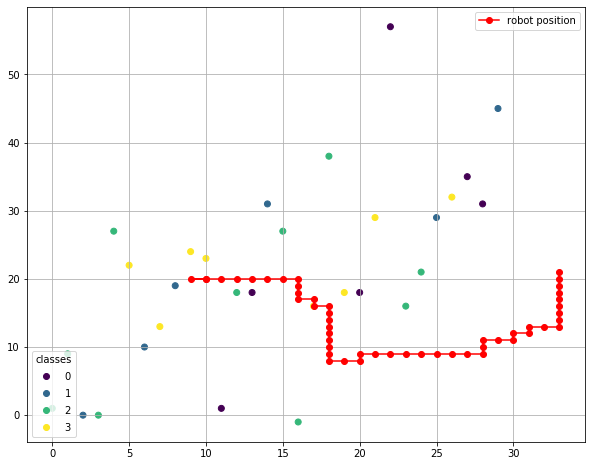

In [33]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

6
6
10
8


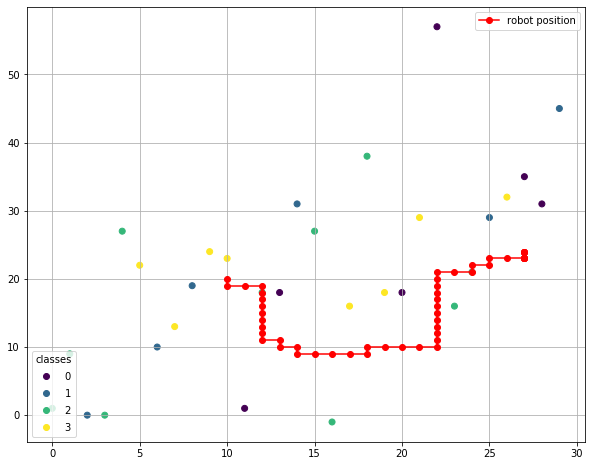

In [34]:
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

6
6
10
8


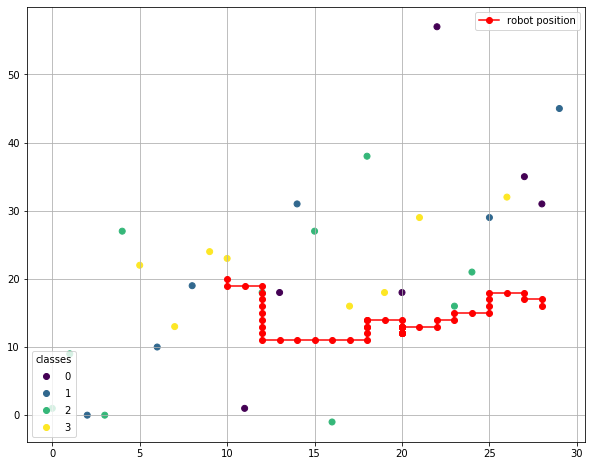

In [35]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

6
6
10
8


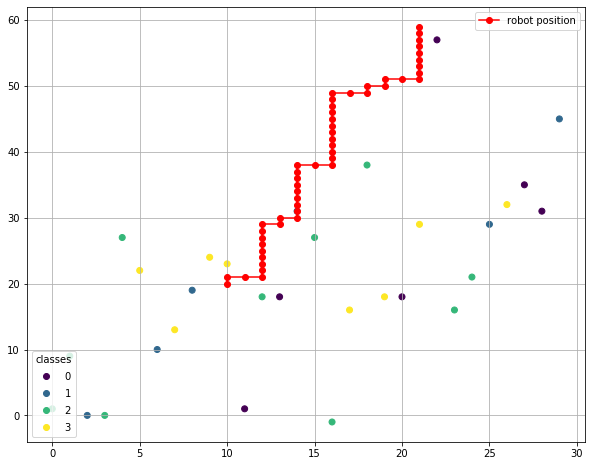

In [36]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

Всего на "поле" мы видем наибольшее число меток соответствуюет повороту вниз (10 меток) и вверх (8 меток). Как мы видем из последнего графика, при увеличения числа соседей в knn до максимума, движение будет только вверх (за счет knn) и вправо ("случайные" 20 %) с примерным соотношением (8:2). Именно такое уменьшение зависимоти от ближайших меток, приводящее к появлению общей закономерности выбора робота, является характерным при увеличении числа соседей. Если назначать метки не случайно, а осмысленно, можно задавать четную траекторию движения робота. Например, научить робота распозновать и объезжать какие-либо препятствия с сохранением общего курса движения.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [37]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [38]:
data.isnull().sum()
# нет пропущенных значений 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [39]:
data = data.drop('Unnamed: 0', axis=1)
data
# есть стобец дополнительной индексации, в нем нет смысла

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [40]:
print(data[['price', 'carat', 'clarity', 'depth', 'table', 'x', 'y', 'z']].corr())

          price     carat     depth     table         x         y         z
price  1.000000  0.921591 -0.010647  0.127134  0.884435  0.865421  0.861249
carat  0.921591  1.000000  0.028224  0.181618  0.975094  0.951722  0.953387
depth -0.010647  0.028224  1.000000 -0.295779 -0.025289 -0.029341  0.094924
table  0.127134  0.181618 -0.295779  1.000000  0.195344  0.183760  0.150929
x      0.884435  0.975094 -0.025289  0.195344  1.000000  0.974701  0.970772
y      0.865421  0.951722 -0.029341  0.183760  0.974701  1.000000  0.952006
z      0.861249  0.953387  0.094924  0.150929  0.970772  0.952006  1.000000


Больше всего с ценой коррелируют число карат, и параметры x, y, z. 

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [41]:
data = pd.get_dummies(data, drop_first=True)
print(data.shape)
data.head()

(53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [42]:
y = data['price']
X = data.drop('price', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed())

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [44]:
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(data=X_train_norm)
X_test_norm = pd.DataFrame(data=X_test_norm)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
LRM = LinearRegression()
LRM.fit(X_train_norm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print ("Train: {}".format(mean_squared_error(y_train, LRM.predict(X_train_norm))))
print ("Test: {}".format(mean_squared_error(y_test, LRM.predict(X_test_norm))))

Train: 1289647.376068897
Test: 1248556.80970102


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [48]:
coef = LRM.coef_
print(coef)

[ 5267.02706507   -87.4362569    -61.98988399 -1057.95172302
    15.51534518   -49.11901396   179.96457835   422.21692333
   346.92457823   321.29191572   -77.07784061  -109.63092557
  -197.9781027   -345.45007893  -439.11630419  -527.38677367
   959.87757908  1566.81596037  1007.8723366   1644.34355415
  1775.06179976  1240.25878854  1434.3187653 ]


Гаибольшие модули коэфициентов модели у признаков carat (5343.421359), x (-2295.4086231) и y (1170.40546336).

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [49]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(10).fit(X_train_norm,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_norm))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_norm))))

Train: 1289768.975471748
Test: 1249629.476097809


In [50]:
lasso = Lasso(10).fit(X_train_norm,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_norm))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_norm))))

Train: 1348585.604696579
Test: 1313798.7604682418


In [52]:
print('Сумма весов для lasso-регрессии:', lasso.coef_.sum())
print('Сумма весов для ridge-регрессии:', ridge.coef_.sum())
print('Сумма весов для регрессии:', LRM.coef_.sum())

Сумма весов для lasso-регрессии: 9081.843229713715
Сумма весов для ridge-регрессии: 13082.15339316555
Сумма весов для регрессии: 13228.352286135945


По сравнению с простой линейной регрессией, суммы весов для lasso-регрессии и ridge-регрессии значительно меньше, что говорит о значительной проблеме мультиколлиниарности в изначальной модели. Изменения суммы весов в случае lasso-регресси особенно заметны.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [54]:
lasso1 = Lasso(0.1).fit(X_train_norm,y_train)
lasso2 = Lasso(1).fit(X_train_norm,y_train)
lasso3 = Lasso(10).fit(X_train_norm,y_train)
lasso4 = Lasso(100).fit(X_train_norm,y_train)
lasso5 = Lasso(200).fit(X_train_norm,y_train)
ridge1 = Ridge(0.1).fit(X_train_norm,y_train)
ridge2 = Ridge(1).fit(X_train_norm,y_train)
ridge3 = Ridge(10).fit(X_train_norm,y_train)
ridge4 = Ridge(100).fit(X_train_norm,y_train)
ridge5 = Ridge(200).fit(X_train_norm,y_train)

In [55]:
lassos = []
ridges = []
for i in [lasso1, lasso2, lasso3, lasso4, lasso5]:
    lassos.append(np.linalg.norm(i.coef_))
for i in [ridge1, ridge2, ridge3, ridge4, ridge5]:
    ridges.append(np.linalg.norm(i.coef_))
lassos = np.array(lassos)
ridges = np.array(ridges)
alphas = np.array([0.1, 1, 10, 100, 200])

Text(0.5, 1.0, 'График измненения евклидовой нормы весов в зависимости от параметра alpha')

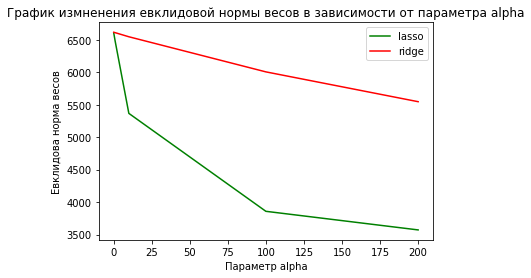

In [68]:
plt.plot(alphas, lassos, 'g', alphas, ridges, 'r')
plt.legend(['lasso','ridge'])
plt.xlabel('Параметр alpha')
plt.ylabel('Eвклидова норма весов')
plt.title("График измненения евклидовой нормы весов в зависимости от параметра alpha")

Ridge регрессия использует все признаки, стараясь минимизировать отбрасываемые данные. Lasso производит отбор признаков, что предпочтительнее, когда среди признаков имеются шумовые и взаимосвязянные признаки. 

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv=5).fit(X_train_norm, y_train)
mist = pd.DataFrame(reg.mse_path_)
mist['mist'] = mist.mean(axis=1)
mist['alpha'] = pd.DataFrame(reg.alphas_)
mist

Наименьшую ошибку дает альфа = 0.1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso = Lasso(0.1).fit(X_train_norm,y_train)
lasso.coef_

Наиболее информативными как и ожидалось вначале оказались признаки carat (5335.34170565), x (-2114.62561243) и y (997.95793295). Из категориальных признаков наиболее информатианым является признак clarity. Наименее информативными признаками оказались depth и table. Наиболее информативные признаки с обывательской тички звения имеют логичное значение в формировании цены (вес, и параментры размера и чистота), дополнительно вещественные признаки среди них имеют большой разброс значений, что также хорошо сказывается на предсказательной способности.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_norm))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_norm))))

Модель с импользованием Lasso оказалась лучше чем обычная линейная регрессия (1521428 против 1456836). Причиной улучшения предсказательной способности является в том, что регуляризация с помощью lasso позволяет решить проблему мультиколлинеарности, переобучения, и уменьшает разброс коэффициентов.